<a href="https://colab.research.google.com/github/Gulzar-khan/ML-PRACTICE/blob/main/Assignment_K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u><b> Objective </b></u>
## <b>Build a recommender system which would recommend the 5 most similar movies to a movie query. </b>

### Suppose you are working at IMDB and you want to find out which movies are similar to a given movie. We can use kNN algorithm to identify the most similar movies. In the given dataset, we are given a lot of information about a particular movie. We need to restrict ourselves to the columns, Movie ID, Movie Name, IMDB Rating and binary indicators of different genres. 

### A sample dataset might look like :





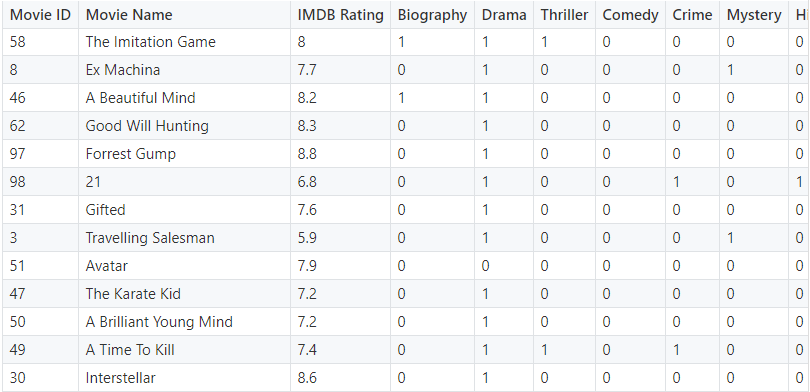

### You can keep all the genres indicators as columns. Suppose in the column genres, you have 20 distinct genres then you will create 20 different indicators.

### Also you need to take any 1000 movies in your train dataset and 10 movies in your test corresponding to which you need to print the 5 most similar movies since kNN becomes computationally intensive as the number of observations increases.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/imdb_data.csv')

In [ ]:
df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [ ]:
df.shape

(3000, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [ ]:
df.isnull().values.any()

True

In [ ]:
print(df.isnull().sum())

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64


In [ ]:
df.drop(['belongs_to_collection','homepage','tagline'],inplace=True,axis=1)

Converting the string values to proper list and we are using it on columns -->  genres
Converting only non null string

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3000 non-null   int64  
 1   budget                3000 non-null   int64  
 2   genres                2993 non-null   object 
 3   imdb_id               3000 non-null   object 
 4   original_language     3000 non-null   object 
 5   original_title        3000 non-null   object 
 6   overview              2992 non-null   object 
 7   popularity            3000 non-null   float64
 8   poster_path           2999 non-null   object 
 9   production_companies  2844 non-null   object 
 10  production_countries  2945 non-null   object 
 11  release_date          3000 non-null   object 
 12  runtime               2998 non-null   float64
 13  spoken_languages      2980 non-null   object 
 14  status                3000 non-null   object 
 15  title                

In [ ]:
def convert_to_list(str):
  return eval(str)

In [ ]:
df.loc[~df['genres'].isna(),'genres']= df.loc[~df['genres'].isna(),'genres'].apply(convert_to_list)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(2606, 20)

In [ ]:
df.genres[1]

[{'id': 35, 'name': 'Comedy'},
 {'id': 18, 'name': 'Drama'},
 {'id': 10751, 'name': 'Family'},
 {'id': 10749, 'name': 'Romance'}]

In [ ]:
bb=[]
for i in df.genres:
  for k in i:
   for j in k:
     if j=='name':
       if k[j] not in bb:
         bb.append(k[j])
         
      



In [ ]:
bb

['Comedy',
 'Drama',
 'Family',
 'Romance',
 'Action',
 'Music',
 'Adventure',
 'Crime',
 'Thriller',
 'Science Fiction',
 'Mystery',
 'Horror',
 'Animation',
 'Fantasy',
 'War',
 'Western',
 'Documentary',
 'History',
 'Foreign',
 'TV Movie']

In [ ]:
#  Declare a list that is to be converted into a column
# address = ['Delhi', 'Bangalore', 'Chennai', 'Patna']
 
# # Using 'Address' as the column name
# # and equating it to the list
# df['Address'] = address
 

In [ ]:
df1=df[['id','title']]


In [ ]:
# for knowing how much column we have to make
bb=[]
for i in df.genres:
  for k in i:
   for j in k:
     if j=='name':
       if k[j] not in bb:
         bb.append(k[j])

In [ ]:
bb

['Comedy',
 'Drama',
 'Family',
 'Romance',
 'Action',
 'Music',
 'Adventure',
 'Crime',
 'Thriller',
 'Science Fiction',
 'Mystery',
 'Horror',
 'Animation',
 'Fantasy',
 'War',
 'Western',
 'Documentary',
 'History',
 'Foreign',
 'TV Movie']

In [ ]:
len(bb)

20

In [ ]:
df.genres[1]

[{'id': 35, 'name': 'Comedy'},
 {'id': 18, 'name': 'Drama'},
 {'id': 10751, 'name': 'Family'},
 {'id': 10749, 'name': 'Romance'}]

In [ ]:
df.genres[1:3]

1    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
2                        [{'id': 18, 'name': 'Drama'}]
Name: genres, dtype: object

In [ ]:
#For making a list of genre per row for whole df
genre_list=[]
for j in df.genres:
  yy=[]
  for i in j:
    yy.append(i['name'])
    # print(yy)
  genre_list.append(yy)
    # dd.append(yy)
        


In [ ]:
len(genre_list)

2606

In [ ]:
df.genres[1][3]['name']

'Romance'

In [ ]:
df1['popularity']=df['popularity']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df1['genre_list']=genre_list

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df1.reset_index()

,index,id,title,popularity,genre_list
0,0,1,Hot Tub Time Machine 2,6.575393,[Comedy]
1,1,2,The Princess Diaries 2: Royal Engagement,8.248895,"[Comedy, Drama, Family, Romance]"
2,2,3,Whiplash,64.299990,[Drama]
3,8,9,Muppet Treasure Island,6.902423,"[Action, Comedy, Music, Family, Adventure]"
4,9,10,A Mighty Wind,4.672036,"[Comedy, Music]"
...,...,...,...,...,...
2601,2995,2996,Chasers,9.853270,"[Comedy, Romance]"
2602,2996,2997,We Are the Best!,3.727996,"[Drama, Music]"
2603,2997,2998,The Long Kiss Goodnight,14.482345,"[Crime, Action, Mystery, Thriller]"
2604,2998,2999,Along Came Polly,15.725542,"[Comedy, Romance]"


for training choose 1000 rows and for te

In [ ]:
df1

,id,title,popularity,genre_list
0,1,Hot Tub Time Machine 2,6.575393,[Comedy]
1,2,The Princess Diaries 2: Royal Engagement,8.248895,"[Comedy, Drama, Family, Romance]"
2,3,Whiplash,64.299990,[Drama]
8,9,Muppet Treasure Island,6.902423,"[Action, Comedy, Music, Family, Adventure]"
9,10,A Mighty Wind,4.672036,"[Comedy, Music]"
...,...,...,...,...
2995,2996,Chasers,9.853270,"[Comedy, Romance]"
2996,2997,We Are the Best!,3.727996,"[Drama, Music]"
2997,2998,The Long Kiss Goodnight,14.482345,"[Crime, Action, Mystery, Thriller]"
2998,2999,Along Came Polly,15.725542,"[Comedy, Romance]"


In [ ]:
df1

,id,title,popularity,genre_list
0,1,Hot Tub Time Machine 2,6.575393,[Comedy]
1,2,The Princess Diaries 2: Royal Engagement,8.248895,"[Comedy, Drama, Family, Romance]"
2,3,Whiplash,64.299990,[Drama]
8,9,Muppet Treasure Island,6.902423,"[Action, Comedy, Music, Family, Adventure]"
9,10,A Mighty Wind,4.672036,"[Comedy, Music]"
...,...,...,...,...
2995,2996,Chasers,9.853270,"[Comedy, Romance]"
2996,2997,We Are the Best!,3.727996,"[Drama, Music]"
2997,2998,The Long Kiss Goodnight,14.482345,"[Crime, Action, Mystery, Thriller]"
2998,2999,Along Came Polly,15.725542,"[Comedy, Romance]"


In [ ]:
df1=df1.set_index(['title'])
df1

,id,popularity,genre_list
title,,,
Hot Tub Time Machine 2,1,6.575393,[Comedy]
The Princess Diaries 2: Royal Engagement,2,8.248895,"[Comedy, Drama, Family, Romance]"
Whiplash,3,64.299990,[Drama]
Muppet Treasure Island,9,6.902423,"[Action, Comedy, Music, Family, Adventure]"
A Mighty Wind,10,4.672036,"[Comedy, Music]"
...,...,...,...
Chasers,2996,9.853270,"[Comedy, Romance]"
We Are the Best!,2997,3.727996,"[Drama, Music]"
The Long Kiss Goodnight,2998,14.482345,"[Crime, Action, Mystery, Thriller]"


In [ ]:
df1.drop(['id'],inplace=True,axis=1)

In [ ]:
df1

,popularity,genre_list
title,,
Hot Tub Time Machine 2,6.575393,[Comedy]
The Princess Diaries 2: Royal Engagement,8.248895,"[Comedy, Drama, Family, Romance]"
Whiplash,64.299990,[Drama]
Muppet Treasure Island,6.902423,"[Action, Comedy, Music, Family, Adventure]"
A Mighty Wind,4.672036,"[Comedy, Music]"
...,...,...
Chasers,9.853270,"[Comedy, Romance]"
We Are the Best!,3.727996,"[Drama, Music]"
The Long Kiss Goodnight,14.482345,"[Crime, Action, Mystery, Thriller]"


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

df1 = df1.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df1.pop('genre_list')),
                index=df1.index,
                columns=mlb.classes_))

In [ ]:
df1

,popularity,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
title,,,,,,,,,,,,,,,,,,,,,
'71,7.080550,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
(500) Days of Summer,16.376657,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
10 Cloverfield Lane,14.421528,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
10 Items or Less,3.898236,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10 Things I Hate About You,12.069966,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zyzzyx Road,0.717595,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
[REC],8.504511,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
[REC]²,8.853168,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
column_sum= df2.drop(['popularity'],axis=1).sum(numeric_only=True, axis=0)

In [ ]:
column_sum

Action              695
Adventure           426
Animation           127
Comedy              891
Crime               444
Documentary          48
Drama              1352
Family              228
Fantasy             219
Foreign              12
History             122
Horror              287
Music                88
Mystery             216
Romance             497
Science Fiction     271
TV Movie              1
Thriller            735
War                  92
Western              43
dtype: int64

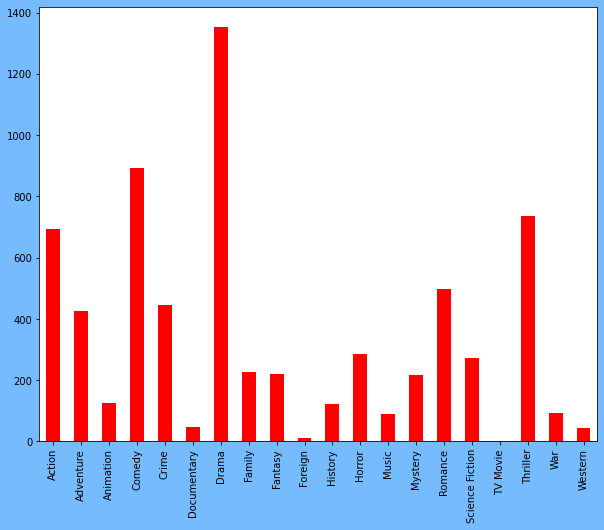

In [ ]:
import seaborn as sns
import matplotlib.colors as colors
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8),edgecolor='k',facecolor='xkcd:sky blue')
column_sum.plot(kind='bar',color='red')
plt.show()

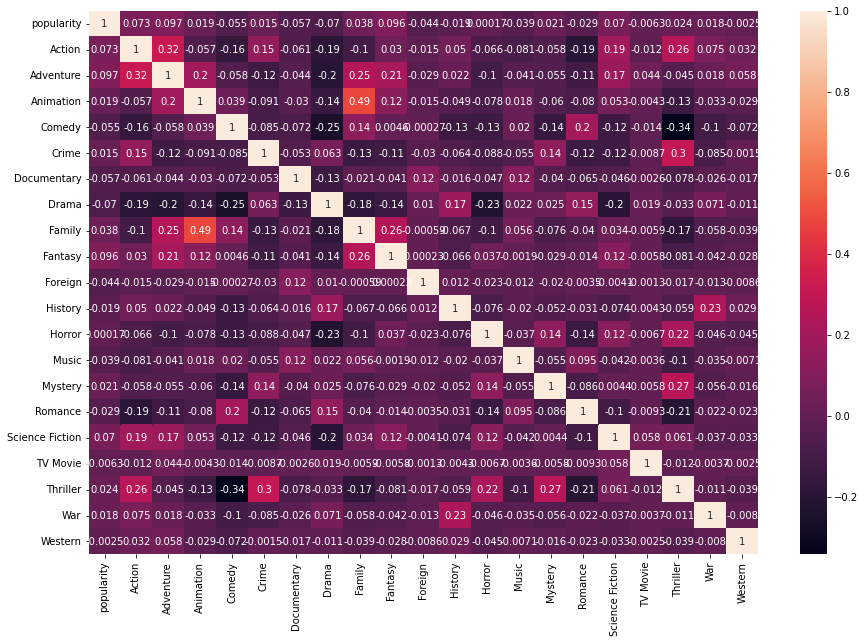

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True)

Rows selection

In [ ]:
X_train=df1[0:1100].drop(['popularity'],axis=1)
X_test=df1[1000:1010].drop(['popularity'],axis=1)

In [ ]:
X_test

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
title,,,,,,,,,,,,,,,,,,,,
In the Line of Fire,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
In the Loop,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
In the Valley of Elah,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
Incarnate,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
Indiana Jones and the Kingdom of the Crystal Skull,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Indiana Jones and the Last Crusade,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Indiana Jones and the Temple of Doom,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Infamous,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Inferno,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
X_train

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
title,,,,,,,,,,,,,,,,,,,,
'71,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
(500) Days of Summer,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
10 Cloverfield Lane,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
10 Items or Less,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10 Things I Hate About You,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Knockaround Guys,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Knocked Up,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
Kops,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train.values

array([[1, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
from scipy.sparse import csr_matrix
# know more about https://www.educative.io/answers/sparse-matrices-in-python

movie_features_df_matrix = csr_matrix(X_train.values)

In [ ]:
movie_features_df_matrix

<1100x20 sparse matrix of type '<class 'numpy.longlong'>'
	with 2796 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.neighbors import NearestNeighbors
# know more about NN https://towardsdatascience.com/knn-k-nearest-neighbors-1-a4707b24bd1d#:~:text=KNN%20(K%20%E2%80%94%20Nearest%20Neighbors),(a%20vector)%20from%20other%20.


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute') #or algo='auto' or metric='minkowski' with that use p-1 or 2 also see doc for minkowski
#X may be a sparse graph, in which case only “nonzero” elements may be considered neighbors.
model_knn.fit(movie_features_df_matrix)


NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
query_index = np.random.choice(X_train.shape[0])
print(query_index)


114


In [ ]:
X.iloc[query_index,:]

popularity         6.159379
Action             0.000000
Adventure          1.000000
Animation          0.000000
Comedy             0.000000
Crime              0.000000
Documentary        0.000000
Drama              1.000000
Family             0.000000
Fantasy            0.000000
Foreign            0.000000
History            0.000000
Horror             0.000000
Music              0.000000
Mystery            0.000000
Romance            1.000000
Science Fiction    0.000000
Thriller           0.000000
War                0.000000
Western            0.000000
Name: Big Miracle, dtype: Sparse[float64, 0]

In [ ]:
np.array(X_train.iloc[query_index,:])

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
      dtype=int64)

In [ ]:
distances, indices = model_knn.kneighbors(np.array(X_train.iloc[query_index,:].values).reshape(1, -1), n_neighbors = 6)


In [ ]:
X_train.index[query_index]

"Ain't Them Bodies Saints"

In [ ]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(X_train.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, X_train.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Ain't Them Bodies Saints:

1: Higher Learning, with distance of 0.13397459621556118:
2: Appaloosa, with distance of 0.13397459621556118:
3: Band of Outsiders, with distance of 0.13397459621556118:
4: Bad Day at Black Rock, with distance of 0.13397459621556118:
5: Butch Cassidy and the Sundance Kid, with distance of 0.25:


In [ ]:
distances.flatten()

array([0.       , 0.1339746, 0.1339746, 0.1339746, 0.1339746, 0.25     ])

for test 



In [ ]:
X_test

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
title,,,,,,,,,,,,,,,,,,,,
In the Line of Fire,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
In the Loop,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
In the Valley of Elah,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
Incarnate,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
Indiana Jones and the Kingdom of the Crystal Skull,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Indiana Jones and the Last Crusade,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Indiana Jones and the Temple of Doom,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Infamous,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Inferno,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
test_movie=X_test.index.tolist()

In [ ]:
for movie_name in test_movie:
    model_knn.fit(X_test)
    distances, indices = model_knn.kneighbors(np.array(X_train.loc[movie_name,:].values).reshape(1, -1), n_neighbors = 6)
    for i in range(0, len(distances.flatten())):
        if i == 0:
            print('Recommendations for {0}:\n'.format(movie_name))
            print()
        else:
            print('{0}: {1}, with distance of {2}:'.format(i, X_train.index[indices.flatten()[i]], distances.flatten()[i]))
    print()

Recommendations for In the Line of Fire:


1: 13, with distance of 0.10557280900008414:
2: 10 Cloverfield Lane, with distance of 0.20000000000000007:
3: 10th & Wolf, with distance of 0.5527864045000421:
4: 12 Rounds, with distance of 0.5527864045000421:
5: 10 to Midnight, with distance of 0.6837722339831621:

Recommendations for In the Loop:


1: 10,000 BC, with distance of 1.0:
2: 10 Things I Hate About You, with distance of 1.0:
3: 12 Rounds, with distance of 1.0:
4: 10th & Wolf, with distance of 1.0:
5: '71, with distance of 1.0:

Recommendations for In the Valley of Elah:


1: '71, with distance of 0.20000000000000007:
2: 13, with distance of 0.3291796067500631:
3: 12 Rounds, with distance of 0.5527864045000421:
4: 10th & Wolf, with distance of 0.5527864045000421:
5: 10 Items or Less, with distance of 0.6837722339831621:

Recommendations for Incarnate:


1: 12 Rounds, with distance of 0.29289321881345254:
2: 13, with distance of 0.6464466094067263:
3: '71, with distance of 0.683772

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  "X does not h

\This is how we are able to genrate recomendations using knn

In [ ]:
from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'minkowski', algorithm = 'auto')
model_knn.fit(movie_features_df_matrix)



NearestNeighbors()

In [ ]:
for movie_name in test_movie:
    model_knn.fit(X_test)
    distances, indices = model_knn.kneighbors(np.array(X_train.loc[movie_name,:].values).reshape(1, -1), n_neighbors = 6)
    for i in range(0, len(distances.flatten())):
        if i == 0:
            print('Recommendations for {0}:\n'.format(movie_name))
            print()
        else:
            print('{0}: {1}, with distance of {2}:'.format(i, X_train.index[indices.flatten()[i]], distances.flatten()[i]))
    print()

Recommendations for In the Line of Fire:


1: 13, with distance of 1.0:
2: 10 Cloverfield Lane, with distance of 1.4142135623730951:
3: 10th & Wolf, with distance of 2.0:
4: 12 Rounds, with distance of 2.0:
5: 10 to Midnight, with distance of 2.23606797749979:

Recommendations for In the Loop:


1: 10th & Wolf, with distance of 1.4142135623730951:
2: 12 Rounds, with distance of 1.4142135623730951:
3: 10 to Midnight, with distance of 1.7320508075688772:
4: 10 Items or Less, with distance of 1.7320508075688772:
5: 10 Things I Hate About You, with distance of 1.7320508075688772:

Recommendations for In the Valley of Elah:


1: '71, with distance of 1.4142135623730951:
2: 13, with distance of 1.7320508075688772:
3: 12 Rounds, with distance of 2.0:
4: 10th & Wolf, with distance of 2.0:
5: 10 Items or Less, with distance of 2.23606797749979:

Recommendations for Incarnate:


1: 12 Rounds, with distance of 1.0:
2: 10th & Wolf, with distance of 1.7320508075688772:
3: (500) Days of Summer, with

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  "X does not h